In [1]:
using IonSim
using QuantumOptics

In [2]:
# Construct the system
C = Ca40([("S1/2", -1/2, "S"), ("D5/2", -1/2, "D")])
L = Laser()
chain = LinearChain(
        ions=[C], comfrequencies=(x=3e6, y=3e6, z=1e6),
        selectedmodes=(;z=[1])
    )
chamber = Chamber(B=4e-4, Bhat=ẑ, iontrap=chain, lasers=[L])

# Set the laser parameters
L.k = (x̂ + ẑ)/√2 
L.ϵ = (x̂ - ẑ)/√2
wavelength_from_transition!(L, C, ("S", "D"), chamber)
E = intensity_from_pitime!(1, 2e-6, 1, ("S", "D"), chamber)

# Set the vibrational mode Hilbert space dimension
# modes(chamber)[1].N = 10 # should be 100
modecutoff!(modes(chamber)[1], 100)

# Construct initial state
ρi_ion = dm(C["S"])
ρi_mode = thermalstate(modes(chamber)[1], 10)  # thermal state n̄=10
ρi = ρi_ion ⊗ ρi_mode

# Construct the hamiltonian
h = hamiltonian(chamber, timescale=1e-6)

# Solve the system
tspan = 0:.1:50
tout, sol = timeevolution.schroedinger_dynamic(tspan, ρi, h);

/Users/jspark971/.julia/conda/3/x86_64/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


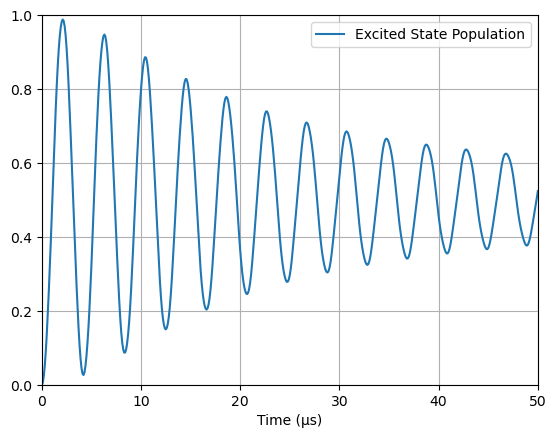

PyObject <matplotlib.legend.Legend object at 0x1200d7010>

In [3]:
# Plotting
import PyPlot
const plt = PyPlot

plt.plot(
        tout, expect(ionprojector(chamber, "D"), sol),
        label="Excited State Population"
    )
plt.xlim(tout[1], tout[end])
plt.ylim(0, 1)
plt.grid()
plt.xlabel("Time (μs)")
plt.legend(loc=1)